# Video: Predicting with Linear Models

This video explains how linear models work with a code example emphasizing the relationship between variables and model coefficients.

In [ ]:
!wget https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/mango-tiny.tsv

--2024-08-13 02:49:52--  https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/mango-tiny.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151 [text/plain]
Saving to: ‘mango-tiny.tsv’

mango-tiny.tsv      100%[===================>]     151  --.-KB/s    in 0s      

2024-08-13 02:49:53 (1.60 MB/s) - ‘mango-tiny.tsv’ saved [151/151]



## Linear Model Definitions

**Definition:** linear function.
> A linear function is a function with the following functional form for inputs with $n$ values -
>
> \begin{array}{rcl}
> f_{\mathbf{c}}(\mathbf{x}) & = & \sum_{i = 0}^{n-1} (x_i * c_i) + c_n \\
> \end{array}
>
> where the parameters $\mathbf{c}$ are a vector of $n+1$ real numbers.

**Definition:** linear model.
> A linear model is a model optimizing a linear functional form to match the target data.


In [ ]:
import csv

In [ ]:
with open("mango-tiny.tsv") as mango_file:
    mango_reader = csv.DictReader(mango_file, dialect="excel-tab")
    data = list(mango_reader)

In [ ]:
data[0]

{'green_rating': '1',
 'yellow_rating': '5',
 'softness': '4',
 'wrinkles': '0',
 'estimated_flavor': '4',
 'estimated_sweetness': '4',
 'rated_flavor': '5'}

In [ ]:
model = {"estimated_flavor" : 0.8, "estimated_sweetness": 0.2, "wrinkles": -0.2}

In [ ]:
def predict(row):
    return sum(float(row[k]) * model.get(k, 0) for k in row)

In [ ]:
[predict(row) for row in data]

[4.0, 4.8, 2.8000000000000003, 1.8]

## Image: Rated Flavor vs Example Model Predictions


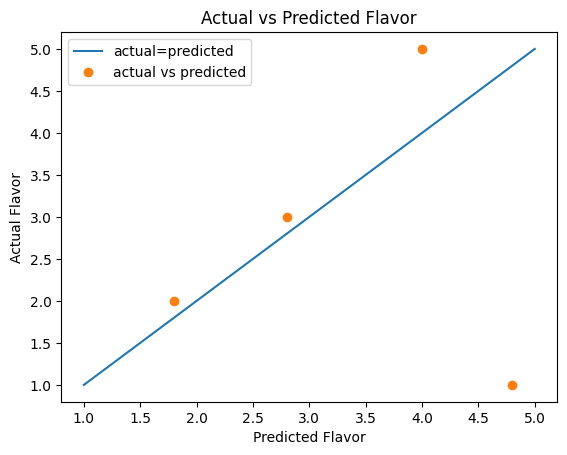

In [ ]:

import matplotlib.pyplot as plt

plt.plot([1, 5], [1, 5], label="actual=predicted")
plt.plot([predict(row) for row in data], [float(row["rated_flavor"]) for row in data], linestyle="none", marker="o", label="actual vs predicted")

plt.legend()
plt.xlabel("Predicted Flavor")
plt.ylabel("Actual Flavor")
plt.title("Actual vs Predicted Flavor")

None